## import required libraries

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## read data

In [2]:
data = pd.read_csv('2019-XTern- Work Sample Assessment Data Science-DS.csv')
data.head()

,scooter_id,xcoordinate,ycoordinate,power_level
0,0,0.906835,0.776484,0
1,1,0.928587,0.804964,2
2,2,0.904091,0.784043,1
3,3,0.906752,0.804461,0
4,4,0.900641,0.781683,4


## explorations of the locations of the vehicles

In [3]:
data.shape
print ("mean of xcoordinates and ycoordinates are = ", data.xcoordinate.mean() , ",",  data.ycoordinate.mean())
print ("variance of xcoordinates and ycoordinates are = ", data.xcoordinate.var() , ",",  data.ycoordinate.var())


mean of xcoordinates and ycoordinates are =  0.49156734566600463 , 0.43708335407137494
variance of xcoordinates and ycoordinates are =  0.22519995427188158 , 0.26594181066241374


## graphical visualization for geolocations

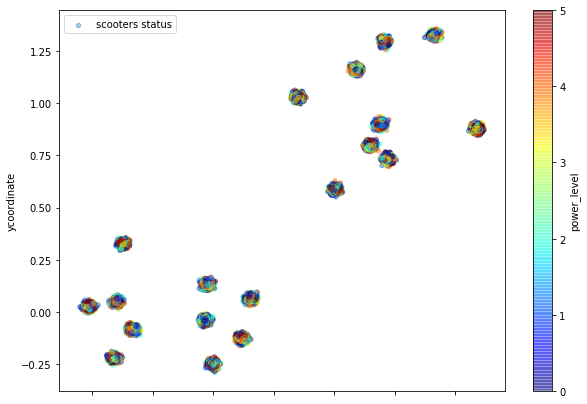

In [4]:
data.plot(kind="scatter", x="xcoordinate", y="ycoordinate", label="scooters status",c="power_level", colorbar=True
          , alpha=0.4, figsize=(10,7),cmap=plt.get_cmap("jet"))#,s=housing['population']/100, 
plt.legend()
plt.show()

## Calculating the distance from the bus park

In [5]:
distance_from_bus_park = np.sqrt((data.xcoordinate-20.19)**2 + (data.ycoordinate-20.19)**2)
# data ['distance'] = distance_from_bus_park
data.insert (3, 'distance', distance_from_bus_park )

In [6]:
# dummies = pd.get_dummies(data.power_level, prefix='power_level')#
# data = pd.concat([data, dummies], axis=1)
# data.drop(data[['power_level']], axis=1, inplace=True)
# data.head()

### Statistics of the dataset


In [7]:
data.describe()

,scooter_id,xcoordinate,ycoordinate,distance,power_level
count,25668.000000,25668.000000,25668.000000,25668.000000,25668.000000
mean,12833.500000,0.491567,0.437083,27.897126,2.496065
std,7409.857691,0.474552,0.515695,0.668921,1.719245
min,0.000000,-0.300062,-0.290196,26.757000,0.000000
25%,6416.750000,0.211375,-0.025581,27.267315,1.000000
50%,12833.500000,0.403102,0.312886,28.225673,2.000000
75%,19250.250000,0.929187,0.883513,28.438409,4.000000
max,25667.000000,1.369517,1.357176,28.851825,5.000000


## Scaling the locations and distance

In [8]:
scaler = MinMaxScaler()
scaler.fit(data.iloc[:,1:4])
data_transformed = scaler.transform(data.iloc[:,1:4])

data_transformed = pd.DataFrame(data=data_transformed,
          index=np.array(range(1, len(data_transformed)+1)),
          columns=['xcoordinate','ycoordinate', 'distance'])#, 
data_transformed['power_level'] = data['power_level']


## Finding the best number of clusters based on the locations of different scoothers 

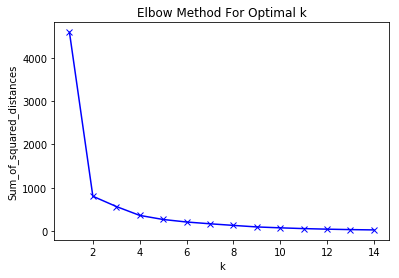

In [9]:
data_clustering = data_transformed[['xcoordinate','ycoordinate']]
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_clustering)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Fitting k means clustering to find the centroids of the clusters using only their locations as features

[[ 1.0708905   1.1435202 ]
 [ 0.2856132  -0.02145622]
 [ 0.84282669  0.7930236 ]
 [-0.15658026  0.01204397]]


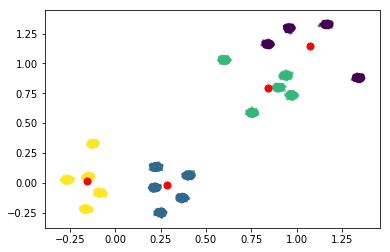

In [10]:
kmeans = KMeans(n_clusters=4).fit(data[['xcoordinate', 'ycoordinate']])#
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(data['xcoordinate'], data['ycoordinate'], c= kmeans.labels_.astype(float), s=5, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

In [11]:
# finding the subjects that falls in the same cluster and add their cluster number as another column to the data
labels= kmeans.labels_ 
data['group']= labels


#### Plotting the data and use their power level as the hight of the scatter plot and their cluster index as their color

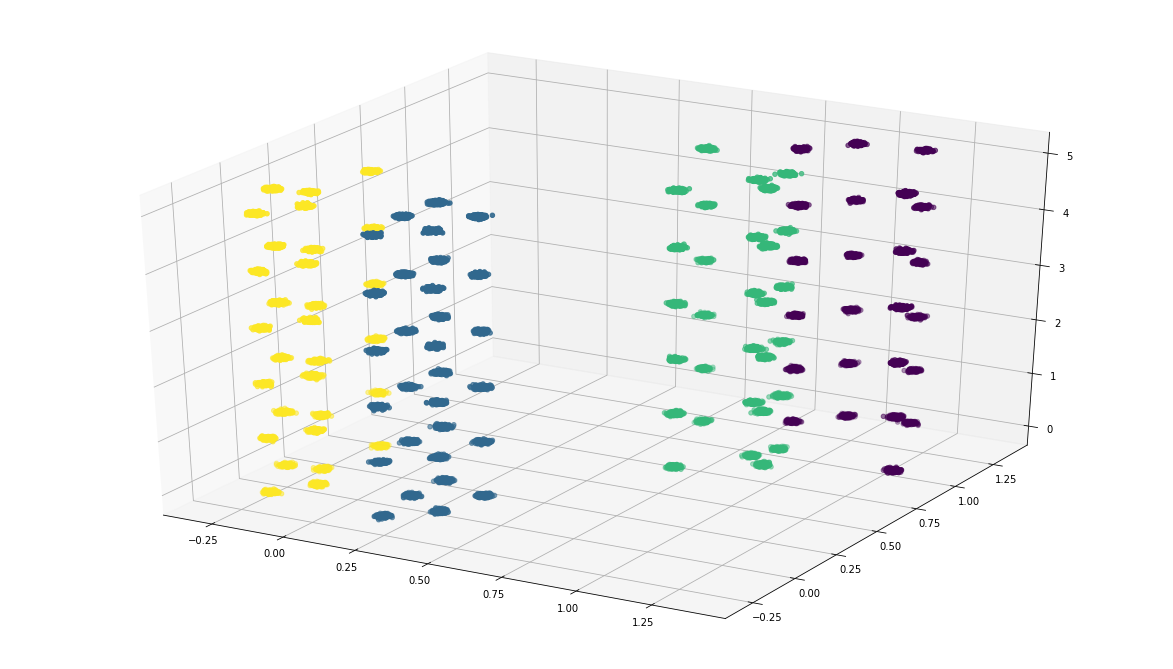

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data['xcoordinate'],data['ycoordinate'], data['power_level'], c = data['group'])
